In [2]:
import numpy as np
import matplotlib.pyplot as plt

# **Datos**

In [3]:
mcolgante= 5 #[kg]
mcal= 202.44 # [gramos]
diametrotubo= 0.048 # [m]
g= 9.80665
n=4
cal=0.220
# Aquí el primer dato es de 0 vueltas, el segundo 100 vueltas, tercero 200, y cuarto de 300
data1=np.array([101.9,84.2,71.3,60.7]) # [Ohm]
data2=np.array([99.6,83.9,70.5,60.1]) # [Ohm]
data3=np.array([95.9,80.7,70.2,58.7])

# **Modelo Fabricante**

In [4]:
Rs=np.array([39.605,41.292,43.062,44.917,46.863,48.905,51.048,53.297,55.658,58.138,60.743,63.480,66.356,69.390,72.560,75.903,79.422,83.124,87.022,91.126,95.447,100,104.800,109.850,115.190,120.810,126.740,133.000,139.610,146.580,153.950,161.730,169.950,178.650,187.840,197.560,207.850,218.730,230.260,242.460,255.380,269.080])
Ts=np.array([46,45,44,43,42,41,40,39,38,37,36,35,34,33,32,31,30,29,28,27,26,25,24,23,22,21,20,19,18,17,16,15,14,13,12,11,10,9,8,7,6,5])

In [ ]:
Resistencias=np.array([58.138,60.743,63.480,66.356,69.390,72.560,75.903,79.422,83.124,87.022,91.126,95.447,100,104.800])
Temperaturas=np.array([37,36,35,34,33,32,31,30,29,28,27,26,25,24])

# **Modelo Planteado en base a rango de datos experimentales**

In [5]:
def temp(x,y,R):
    return x*R+y
def calcular_parametros_ecuacion_lineal(datos):
    if len(datos) < 4:
        raise ValueError("La lista debe contener al menos cuatro valores: x1, x2, y1, y2")
    
    x1, x2, y1, y2 = datos[:4]
    
    # Calculamos 'a' (pendiente)
    a = (y2 - y1) / (x2 - x1)
    
    # Calculamos 'b' (intersección con el eje Y)
    b = y1 - a * x1
    
    return a, b


In [7]:

####### PRIMER DATA SET (calculo de parámetros para eq liñal (a y b0 y temperatura sacada en base al rango del fabricante sacando una eq de recta para cada R, la variable ranges
# los dos primeros argumentos son los limites inferior y superior donde está contenida la resistencia y lo mismo para las temperaturas en los argumentos 3 y 4))

# 0 vueltas para R_0 = 101.9
ranges01=[100,104.8,25,24]
params01=calcular_parametros_ecuacion_lineal(ranges01)
Temp01=temp(params01[0],params01[1],data1[0])

# 100 vueltas para R_100= 84.2
ranges11=[83.124,87.022,29,28]
params11=calcular_parametros_ecuacion_lineal(ranges11)
Temp11=temp(params11[0],params11[1],data1[1])

# 200 vueltas para R_200= 71.3
ranges21=[69.380,72.560,33,32]
params21=calcular_parametros_ecuacion_lineal(ranges21)
Temp21=temp(params21[0],params21[1],data1[2])

# 300 vueltas para R_300 = 60.7
ranges31=[60.743,67.480,36,35]
params31=calcular_parametros_ecuacion_lineal(ranges31)
Temp31=temp(params31[0],params31[1],data1[3])

####### SEGUNDO DATA SET 

# 0 vueltas para R_0 = 99.6
ranges02=[95.447,100,26,25]
params02=calcular_parametros_ecuacion_lineal(ranges02)
Temp02=temp(params02[0],params02[1],data2[0])

# 100 vueltas para R_100= 83.9
ranges12=[83.124,87.022,29,28]
params12=calcular_parametros_ecuacion_lineal(ranges12)
Temp12=temp(params12[0],params12[1],data2[1])

# 200 vueltas para R_200= 70.5
ranges22=[69.380,72.560,33,32]
params22=calcular_parametros_ecuacion_lineal(ranges22)
Temp22=temp(params22[0],params22[1],data2[2])

# 300 vueltas para R_300 = 60.1
ranges32=[58.138,60.743,37,36]
params32=calcular_parametros_ecuacion_lineal(ranges32)
Temp32=temp(params32[0],params32[1],data2[3])

####### TERCER DATA SET 

# 0 vueltas para R_0 = 95.9
ranges03=[95.447,100,26,25]
params03=calcular_parametros_ecuacion_lineal(ranges03)
Temp03=temp(params03[0],params03[1],data3[0])

# 100 vueltas para R_100= 80.7
ranges13=[79.422,83.124,30,29]
params13=calcular_parametros_ecuacion_lineal(ranges13)
Temp13=temp(params13[0],params13[1],data3[1])

# 200 vueltas para R_200= 70.2
ranges23=[69.380,72.560,33,32]
params23=calcular_parametros_ecuacion_lineal(ranges23)
Temp23=temp(params23[0],params23[1],data3[2])

# 300 vueltas para R_300 = 58.7
ranges33=[58.138,60.743,37,36]
params33=calcular_parametros_ecuacion_lineal(ranges33)
Temp33=temp(params33[0],params33[1],data3[3])

##############################
T1=np.array([Temp01,Temp11,Temp21,Temp31])
T2=np.array([Temp02,Temp12,Temp22,Temp32])
T3=np.array([Temp03,Temp13,Temp23,Temp33])

In [28]:
W=2*np.pi*(diametrotubo/2)*mcolgante*g*300 #[J]
def Q(tf,ti):
    return mcal*cal*(tf-ti) #[cal]
Q1=Q(T1[3],T1[0])
Q2=Q(T2[3],T2[0])
Q3=Q(T3[3],T3[0])
Qq=(Q1+Q2+Q3)/3

In [ ]:
print

In [29]:
print(W/Qq)

4.4676046013122015


In [10]:
def error(Q):
    return ((np.abs(4.186-W/Q))/4.186)*100

In [30]:
print(error(Qq))

6.727295779077916


# **Gráficos (ese gráfico no nos sirve, realemente no se si habrá que hacer algún **

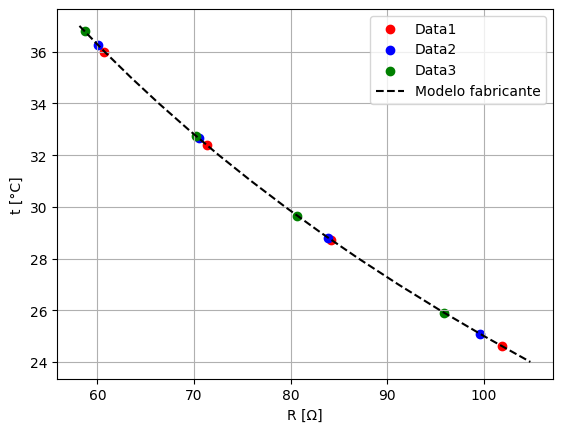

In [ ]:
datalineal1=[data1[0],data1[3],T1[0],T1[3]]
abss1=calcular_parametros_ecuacion_lineal(datalineal1)
datalineal2=[data2[0],data2[3],T2[0],T2[3]]
abss2=calcular_parametros_ecuacion_lineal(datalineal2)
datalineal3=[data3[0],data3[3],T3[0],T3[3]]
abss3=calcular_parametros_ecuacion_lineal(datalineal3)
Tspace=np.linspace(20,40,100)
Rspace=np.linspace(105,55,100)

#plt.plot(Rspace,abss1[0]*Rspace+abss1[1],color="red",label="Recta para 1° tanda de datos")

plt.scatter(data1,T1,c="red",label="Data1")
plt.scatter(data2,T2,c="blue",label="Data2")
plt.scatter(data3,T3,c="green",label="Data3")
plt.plot(Rss,Tss,label=r"Modelo fabricante",color="black",linestyle="--")
plt.xlabel("R [Ω]");plt.ylabel("t [°C]")
plt.grid()
plt.legend()



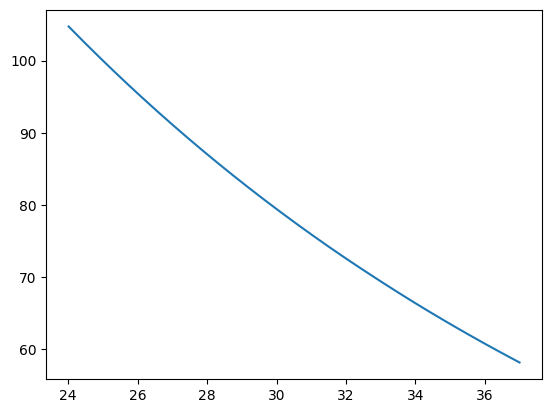

In [ ]:
from scipy import interpolate
Resistencias=np.array([58.138,60.743,63.480,66.356,69.390,72.560,75.903,79.422,83.124,87.022,91.126,95.447,100,104.800])
Temperaturas=np.array([37,36,35,34,33,32,31,30,29,28,27,26,25,24])
rrs=np.arange(Resistencias[0],Resistencias[-1],0.1)
ttas=interpolate.interp1d(Resistencias,Temperaturas,kind="cubic")
aweonao=ttas(rrs)
plt.clf()
plt.plot(aweonao,rrs)
plt.plot()

In [16]:
# Ajuste polinómico de grado 3 (puedes probar con otros grados)
coeficientes = np.polyfit(Resistencias, Temperaturas, 3)

# Generar polinomio a partir de los coeficientes
polinomio = np.poly1d(coeficientes)

# Mostrar ecuación
print("Ecuación ajustada:")
print(polinomio)

Ecuación ajustada:
            3            2
-1.729e-05 x + 0.006169 x - 0.93 x + 73.61


In [36]:
newdatameanR=(data1+data2+data3)/3
newdatameanT=(T1+T2+T3)/3

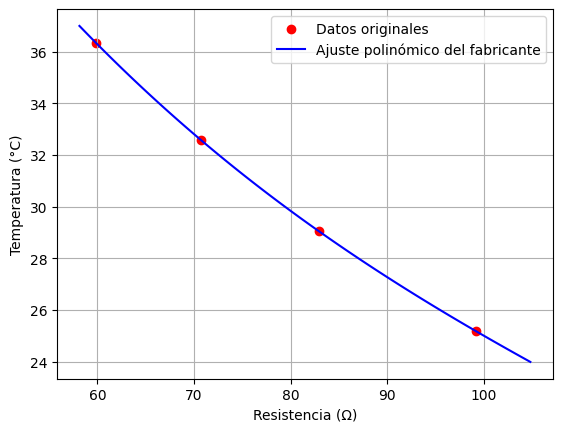

In [37]:
# Graficar datos y ajuste
rrs = np.linspace(Resistencias[0], Resistencias[-1], 100)
plt.scatter(newdatameanR, newdatameanT, label="Datos originales", color="red")
plt.plot(rrs, polinomio(rrs), label="Ajuste polinómico del fabricante", color="blue")
plt.xlabel("Resistencia (Ω)")
plt.ylabel("Temperatura (°C)")
plt.legend()
plt.grid()
plt.show()

In [35]:
newdatameanR=(data1+data2+data3)/3
newdatameanT=(T1+T2+T3)/3